<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Code-setup" data-toc-modified-id="Code-setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Code setup</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data</a></span><ul class="toc-item"><li><span><a href="#Read-items-from-target-model" data-toc-modified-id="Read-items-from-target-model-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Read items from target model</a></span></li><li><span><a href="#Read-organics-data" data-toc-modified-id="Read-organics-data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Read organics data</a></span></li><li><span><a href="#Imputation-for-density" data-toc-modified-id="Imputation-for-density-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Imputation for density</a></span></li><li><span><a href="#Organics-dataframes" data-toc-modified-id="Organics-dataframes-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Organics dataframes</a></span></li><li><span><a href="#Organics-WF-bins" data-toc-modified-id="Organics-WF-bins-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Organics WF bins</a></span></li><li><span><a href="#Smaller-data-frame" data-toc-modified-id="Smaller-data-frame-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Smaller data frame</a></span></li></ul></li><li><span><a href="#Pre-processing" data-toc-modified-id="Pre-processing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Pre-processing</a></span><ul class="toc-item"><li><span><a href="#Data-distributions" data-toc-modified-id="Data-distributions-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Data distributions</a></span></li><li><span><a href="#Preliminary-performance-check" data-toc-modified-id="Preliminary-performance-check-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Preliminary performance check</a></span></li><li><span><a href="#PCA" data-toc-modified-id="PCA-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>PCA</a></span></li><li><span><a href="#Hierarchical-Agglomerative-Clustering-(HAC)" data-toc-modified-id="Hierarchical-Agglomerative-Clustering-(HAC)-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Hierarchical Agglomerative Clustering (HAC)</a></span><ul class="toc-item"><li><span><a href="#Dendrograms-and-elbow-graph" data-toc-modified-id="Dendrograms-and-elbow-graph-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>Dendrograms and elbow graph</a></span></li><li><span><a href="#Helper-class-for-selecting-best-ENM-estimator" data-toc-modified-id="Helper-class-for-selecting-best-ENM-estimator-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>Helper class for selecting best ENM estimator</a></span></li><li><span><a href="#Pipeline/GridSearch-to-select-n_clusters" data-toc-modified-id="Pipeline/GridSearch-to-select-n_clusters-3.4.3"><span class="toc-item-num">3.4.3&nbsp;&nbsp;</span>Pipeline/GridSearch to select n_clusters</a></span></li><li><span><a href="#Apply-feature-agglomeration-using-optimized-n_clusters" data-toc-modified-id="Apply-feature-agglomeration-using-optimized-n_clusters-3.4.4"><span class="toc-item-num">3.4.4&nbsp;&nbsp;</span>Apply feature agglomeration using optimized n_clusters</a></span></li><li><span><a href="#Concatenate-final-dataframe" data-toc-modified-id="Concatenate-final-dataframe-3.4.5"><span class="toc-item-num">3.4.5&nbsp;&nbsp;</span>Concatenate final dataframe</a></span></li></ul></li></ul></li><li><span><a href="#Core-models" data-toc-modified-id="Core-models-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Core models</a></span><ul class="toc-item"><li><span><a href="#Compare-feature-predictivity" data-toc-modified-id="Compare-feature-predictivity-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Compare feature predictivity</a></span></li><li><span><a href="#PCA,-WF-Bins" data-toc-modified-id="PCA,-WF-Bins-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>PCA, WF Bins</a></span></li><li><span><a href="#NEW-ENM-Model-(Clusters)" data-toc-modified-id="NEW-ENM-Model-(Clusters)-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>NEW ENM Model (Clusters)</a></span></li><li><span><a href="#NEW-ENM-Model-(PCA)" data-toc-modified-id="NEW-ENM-Model-(PCA)-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>NEW ENM Model (PCA)</a></span></li></ul></li></ul></div>

# Code setup

In [8]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# To suppress warning output
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# Important imports
import numpy as np
from numpy import random
import pandas as pd
import os, sys

In [9]:
# To make this notebook's output stable across runs
np.random.seed(24)

In [10]:
# To plot nice figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.image as mpimg
plt.rcParams['axes.titlesize'] = 'x-large' #16
plt.rcParams['axes.labelsize'] = 'x-large'
plt.rcParams['xtick.labelsize'] = 'x-large'
plt.rcParams['ytick.labelsize'] = 'x-large'

In [11]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
PROJECT_SAVE_DIR = "figs"

if not (os.path.isdir(PROJECT_ROOT_DIR+'/'+PROJECT_SAVE_DIR)):
    print('Figure directory did not exist, creating now.')
    os.mkdir(PROJECT_ROOT_DIR+'/'+PROJECT_SAVE_DIR)
else:
    print('Figure directory exists.')

Figure directory exists.


In [12]:
# Import classes and functions used across multiple notebooks
sys.path.append(os.getcwd())
import importlib
import functions as blt
importlib.reload(blt);

Figure directory exists.


# Data

## Read items from target model

These will be used to help shape the organics data frame.

In [13]:
# Import data frame headings from target model
enm_cols = []
with open('./data/column-headers.txt', 'r') as filehandle:  
    for line in filehandle:
        # remove linebreak which is the last character of the string
        currentCol = line[:-1]
        # add item to the list
        enm_cols.append(currentCol)
enm_cols

['propMW',
 'propMP',
 'propBP',
 'propDensity',
 'absorbent',
 'anti_adhesive_cohesive',
 'antioxidant',
 'antiredeposition_agent',
 'biocide',
 'brightener',
 'chemical_reaction_regulator',
 'colorant',
 'deodorizer',
 'filler',
 'flavouring_nutrient',
 'hardener',
 'humectant',
 'opacifier',
 'uv_stabilizer',
 'viscosity_modifier',
 'gen_AC',
 'gen_CP',
 'gen_EL',
 'gen_HM',
 'gen_PC',
 'gen_PE',
 'gen_VE',
 'group_childspecific',
 'group_dentalcare',
 'group_deodorant',
 'group_enginemaintenance',
 'group_fabrictreatmentanddye',
 'group_facialcleansingandmoisturizing',
 'group_fungicide',
 'group_generalhouseholdcleaning',
 'group_generalmoisturizing',
 'group_makeupandrelated',
 'group_paintstainandrelatedproducts',
 'group_sunscreen',
 'group_surfacesealers',
 'refined_spray',
 'matrix_F',
 'WF_measured']

In [14]:
# Read product category data for applying feature agglomeration later
Xp_enm = pd.read_csv("./data/ENM-Xp.csv", sep='\t', index_col=0)
Xp_enm.head(4)

,gen_AC,gen_CP,gen_EL,gen_HM,gen_PC,gen_PE,gen_VE,group_childspecific,group_dentalcare,group_deodorant,group_enginemaintenance,group_fabrictreatmentanddye,group_facialcleansingandmoisturizing,group_fungicide,group_generalhouseholdcleaning,group_generalmoisturizing,group_makeupandrelated,group_paintstainandrelatedproducts,group_sunscreen,group_surfacesealers
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


## Read organics data

In [23]:
# Read in organics weight fraction data
y_source = pd.read_csv("./data/organics-clean.csv", sep=',', usecols=[2])
print(y_source.shape)

(29373, 1)


In [24]:
# Read in organcis potential predictive variables
X_source = pd.read_csv("./data/organics-clean.csv", sep=',', index_col=0)

# Drop unwanted columns (CASRN, WF, product type, chem-props unused in ENM df)
X_source.drop(X_source.columns[[0,1,4,8,9,10,11,14,15,17]], 
              axis=1, inplace=True)

# Rename columns
X_source.rename(columns = {'gencatID':'gen'}, inplace = True)
X_source.rename(columns = {'refined_product_type':'refined'}, inplace = True)
X_source.rename(columns = {'assignedID':'matrix'}, inplace = True)

In [25]:
# Clean up data in refined column so it's only spray vs NOC

# Find/replace sprays
X_source.loc[X_source['refined'].str.contains(
    "spray", na=False) == True, 'refined'] = "spray"
# Find/replace everything else with NOC
X_source.loc[X_source.refined != "spray", 'refined'] = "NOC"
# Check unique values for refined column
X_source.refined.unique()

array(['NOC', 'spray'], dtype=object)

In [26]:
# Transform factor data (product categories) into binary columns
X_source=pd.get_dummies(X_source, prefix=["gen","group","refined","matrix"], 
                        columns=["gen","group","refined","matrix"])

# Clean up column names
X_source.columns = X_source.columns.str.replace(' ','')
X_source.columns = X_source.columns.str.replace('/','')
X_source.columns = X_source.columns.str.replace('-','')

In [27]:
# If there are ENM features not present in organics df, add them

# List differences between feature sets
cols_add = list(set(enm_cols) - set(X_source.columns.tolist()))
# Assign these features to organics df with default values of zero
for col in cols_add:
    X_source[col] = 0

In [28]:
# Delete unwanted samples

# Restructure organics features df to match ENM df
X_source = X_source[enm_cols]
# Temporarily add WF labels to df
X_source = pd.concat([y_source, X_source], axis=1)
# Delete rows that are missing important chemical property data
X_source = X_source[X_source['propMP'].notnull()] # delete missing data
# Remove outlier lacking density data
X_source = X_source[X_source['propMP'] > -170]
# Delete rows that don't have enough data (ones)
X_source = X_source[X_source.iloc[:,5:].sum(axis=1) > 2]

print(X_source.shape)

(16354, 44)


In [29]:
# Extract wf labels (y) from new X_source
y_source = X_source[['maximum_weight_fraction']]
X_source.drop(X_source.columns[[0]], axis=1, inplace=True)
print(y_source.shape)

(16354, 1)


In [30]:
# Preview final main dataframe
X_source.tail(5)

,propMW,propMP,propBP,propDensity,absorbent,anti_adhesive_cohesive,antioxidant,antiredeposition_agent,biocide,brightener,...,group_fungicide,group_generalhouseholdcleaning,group_generalmoisturizing,group_makeupandrelated,group_paintstainandrelatedproducts,group_sunscreen,group_surfacesealers,refined_spray,matrix_F,WF_measured
29366,152.149,84.03215,263.941,1.198,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
29367,152.149,84.03215,263.941,1.198,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29368,152.149,84.03215,263.941,1.198,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
29369,135.210,-31.78080,203.080,0.930,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29370,135.210,-31.78080,203.080,0.930,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Imputation for density

In [31]:
# Log-transform density so that it's no longer skewed
X_source['propLogDensity'] = X_source['propDensity'].apply(np.log10)

In [32]:
# How much density data is missing?
print(X_source[~X_source['propLogDensity'].notnull()].shape)

# Percent of density data missing
len(X_source[~X_source['propLogDensity'].notnull()])/len(X_source)

(639, 44)


0.03907300966124495

In [33]:
# Replace propDensity with propLogDensity in data frame
cols = X_source.columns.tolist()
cols = cols[:3] + cols[-1:] + cols[4:-1]
X_source = X_source[cols]

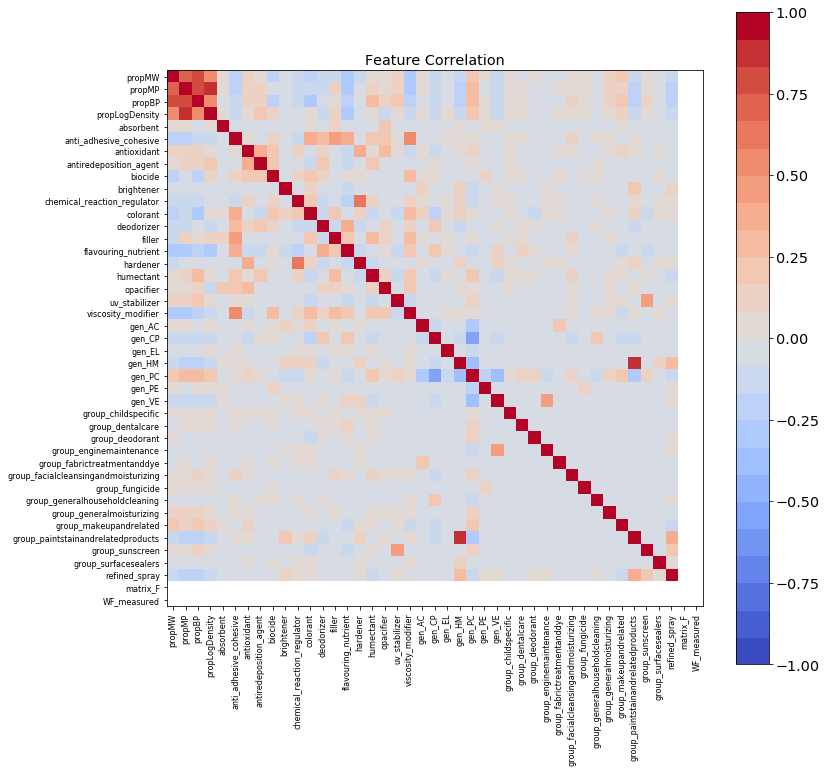

In [34]:
# Check correlations between features to determine 
# best independent variable for imputation

def correlation_matrix(df):
    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(111)
    cmap = cm.get_cmap('coolwarm', 24)
    cax = ax.imshow(df.corr(), cmap=cmap, vmin=-1, vmax=1)
    plt.title('Feature Correlation')
    labels = df.columns.tolist()
    ax.set_xticks(range(len(df.columns)))
    ax.set_yticks(range(len(df.columns)))
    ax.set_xticklabels(labels,fontsize=8, rotation=90)
    ax.set_yticklabels(labels,fontsize=8)
    fig.colorbar(cax)
    plt.show()

correlation_matrix(X_source)

In order to find missing values for density, imputation will be performed using linear regression. Melting point has the highest correlation with density and will therefore be used as the independent variable.
Assuming the line of best fit for a set of points is given by:

$y = a + b x$

where:

$b = \Large{\frac{\sum x_i  y_i - n \bar x\bar y )} {\sum (x_i - \bar x)^2}} $

and

$a = \bar y - b \bar x$

* To remove outliers: https://www.kdnuggets.com/2017/02/removing-outliers-standard-deviation-python.html

In [35]:
# Find line of best fit for imputation

# MP and density arrays for continuous data
X = np.array(X_source.loc[X_source.propLogDensity.notnull(), ['propMP']])
Y = np.array(X_source.loc[X_source.propLogDensity.notnull(), 
                          ['propLogDensity']])

# Solve for 'a' and 'b'
def best_fit(X, Y):
    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)
    numer = sum(xi*yi for xi,yi in zip(X, Y)) - n * xbar * ybar
    denum = sum(xi**2 for xi in X) - n * xbar**2
    b = numer / denum
    a = ybar - b * xbar
    return a, b

a, b = best_fit(X, Y)

# MP and density arrays for missing data
X_null = np.array(X_source.loc[X_source.propLogDensity.isnull(), ['propMP']])
Y_null = b * X_null + a

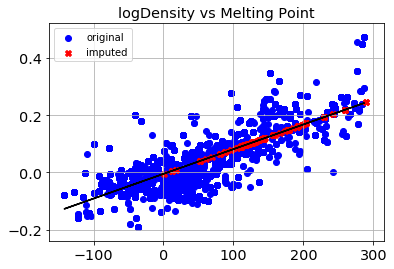

In [36]:
# Plot points and fit line
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(X, Y, c = 'b', label="original")
ax1.scatter(X_null, Y_null, c = 'r', marker = 'X', label="imputed")
yfit = [a + b * xi for xi in X]
ax1.plot(X, yfit, color='black')

plt.title("logDensity vs Melting Point")
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [37]:
# Put imputed densities into data frame
for idx in X_source.index:
    if pd.isnull(X_source.loc[idx,"propLogDensity"]):
        MP = X_source.loc[idx,"propMP"]
        X_source.loc[idx,"propLogDensity"] = (b * MP + a)

## Organics dataframes

I split up X_source into a few separate dataframes for doing separate hierarchical clustering later on.

In [38]:
# Dataframe for only ENM functional use categories
Xf_source=pd.DataFrame(X_source)
# Drop unwanted columns
Xf_source.drop(Xf_source.columns[0:4], axis=1, inplace=True) # drop chem props
Xf_source.drop(Xf_source.columns[16:], axis=1, inplace=True) # drop all else
source_func_names=list(Xf_source.columns.values)

In [43]:
# Dataframe for only ENM product categories
Xp_source=pd.DataFrame(X_source)
# Drop unwanted columns
Xp_source.drop(Xp_source.columns[0:20], axis=1, inplace=True) 
Xp_source.drop(Xp_source.columns[-3:], axis=1, inplace=True) 
source_PUC_names=list(Xp_source.columns.values)

In [45]:
# Array for only chemical properties
Xc_source=pd.DataFrame(X_source)
# Drop unwanted columns
Xc_source.drop(Xc_source.columns[4:], axis=1, inplace=True)
list(Xc_source.columns.values)

['propMW', 'propMP', 'propBP', 'propLogDensity']

In [46]:
# Dataframe for only ENM product categories
Xm_source=pd.DataFrame(X_source)
# Drop unwanted columns
Xm_source.drop(Xm_source.columns[:-3], axis=1, inplace=True)
list(Xm_source.columns.values)

['refined_spray', 'matrix_F', 'WF_measured']

## Organics WF bins

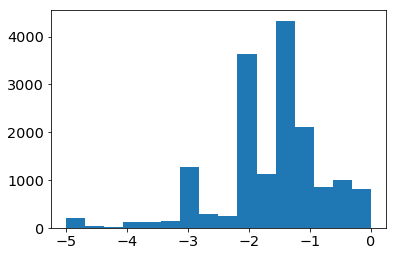

In [47]:
# Log-transformed histogram of weight fraction
plt.hist(np.log10(np.asarray(y_source)+0.00001), bins=16);

In [48]:
# Define function to assign weight fractions to bins per Isaacs et al. 2016
def bins(row):
    if row['maximum_weight_fraction'] <= 0.01:
        val = 'bottom'
    elif row['maximum_weight_fraction'] > 0.05:
        val = 'top'
    else:
        val = 'middle'
    return val
bin_source_isaacs = y_source.apply(bins, axis=1)

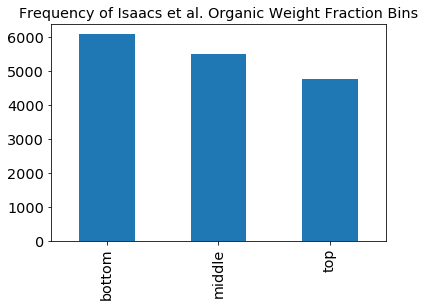

In [49]:
bin_source_isaacs.value_counts()[['bottom','middle','top']].plot(kind='bar')
plt.title('Frequency of Isaacs et al. Organic Weight Fraction Bins');

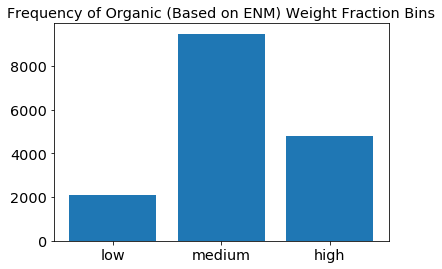

Label bin:  [0 1 2]
Count    :  [2105 9472 4777]
Frequency:  [0.13, 0.58, 0.29]


In [50]:
# Apply bins to organics data
# (slightly different ranges from those used by Isaacs et al. 2016)
bin_source = np.asarray(y_source.apply(blt.bins, axis=1))
# View bar plot of ENM WF bins
blt.bar_graph_bins(bin_source, data_composition='Organic (Based on ENM)')

## Smaller data frame

In [51]:
# Alternate data frame with more positive labels in each row
X_source4 = X_source[X_source.iloc[:,5:].sum(axis=1) > 3]

print(X_source4.shape)

(11801, 43)


In [52]:
# Apply x indices to y data frame so they match
y_source4 = y_source.iloc[y_source.index.searchsorted(X_source4.index)]

# Fit the encoder and transform categories into integers
bin_source4 = np.asarray(y_source4.apply(blt.bins, axis=1))

print(bin_source4.shape)

(11801,)


# Pre-processing

## Data distributions

In [58]:
# Function for plotting piecharts
def plot_piechart(data,
                  labels, 
                  save_fig_name):
    my_colors = ["#1f77b4","#ff7f0e","#ffdf00","#d62728","#9467bd",
                 "#2ca02c","#1034A6","#ffbf33","#8B0000",'teal',
                 "#aada30","#e37799","#17becf","#7f7f7f","#cc0099","#0B6623"]
    fig, ax = plt.subplots(figsize=(6,6))
    ax.pie(data, autopct='%1.1f%%', 
           colors=my_colors, 
           labels=labels, 
           pctdistance=0.9, labeldistance=1.05, 
           startangle=90, counterclock=False, 
           textprops={'fontsize':9})
    ax.axis('equal')
    ax.set_title(save_fig_name, weight="bold")
    fig.savefig('./figs/pie_%s.png' 
                % save_fig_name.lower().replace(' ','_'))
    plt.show()

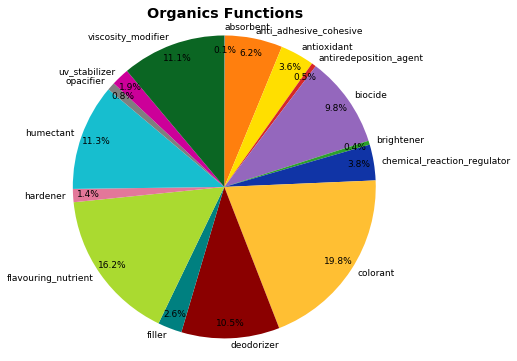

In [59]:
# Organics function breakdown as pie chart
plot_piechart(data=Xf_source.sum(axis=0), 
              labels=source_func_names, 
              save_fig_name='Organics Functions')

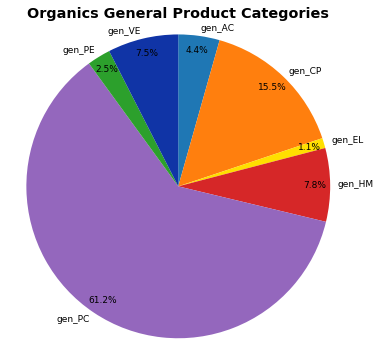

In [60]:
# Organics PUC breakdown as pie chart
plot_piechart(data=Xp_source.values[:,0:7].sum(axis=0), 
              labels=source_PUC_names[0:7], 
              save_fig_name='Organics General Product Categories')

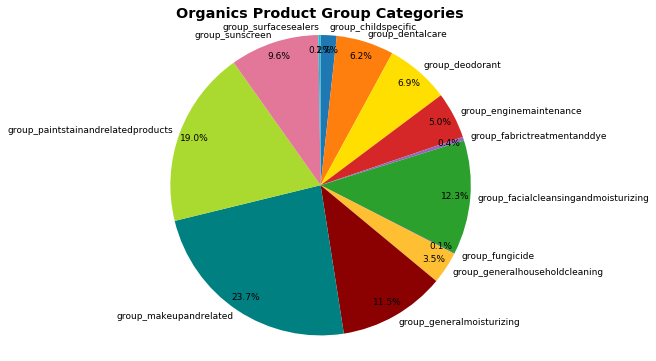

In [61]:
# Organics PUC breakdown as pie chart
plot_piechart(data=Xp_source.values[:,7:].sum(axis=0), 
              labels=source_PUC_names[7:], 
              save_fig_name='Organics Product Group Categories')

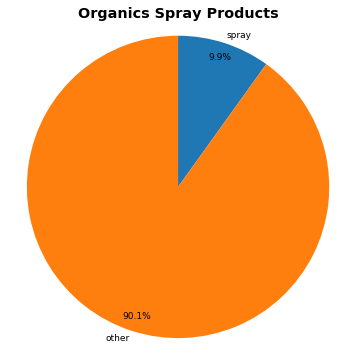

In [62]:
# Organics spray products as pie chart
labels = ['spray','other']
values = [(np.count_nonzero(X_source['refined_spray'])), 
          (len(X_source['refined_spray']) \
           - np.count_nonzero(X_source['refined_spray']))]
plot_piechart(data=values, 
              labels=labels, 
              save_fig_name='Organics Spray Products')

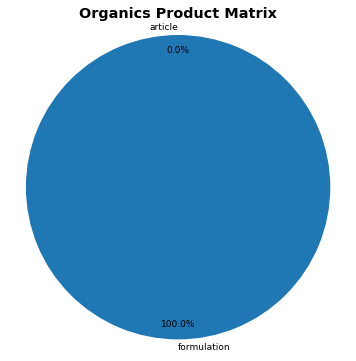

In [63]:
# Organics product matrices as pie chart
labels = ['formulation','article']
values = [(np.count_nonzero(X_source['matrix_F'])), 
          (len(X_source['matrix_F']) - np.count_nonzero(X_source['matrix_F']))]
plot_piechart(data=values, 
              labels=labels, 
              save_fig_name='Organics Product Matrix')

## Preliminary performance check

In [114]:
# SVC-RBF with all features, normalized
    # Binned weight fractions
    # Accuracy

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

# Pipeline
estimator = SVC(kernel='rbf')
prepipe = Pipeline([
    ('scale', MinMaxScaler()),
    ('estimator', estimator)
])

# Set parameter ranges for gridsearch
cv=10
n_jobs=3
c_set=[0.1, 1, 10, 30]
gamma_set=[0.0001, 0.001, 0.01]

# Gridsearch
param_grid={'estimator__C': c_set,
            'estimator__gamma': gamma_set
           }
grid_search=GridSearchCV(prepipe,param_grid,cv=cv,scoring='accuracy', n_jobs=n_jobs, pre_dispatch=2*n_jobs)
grid_search.fit(X_source,bin_source)
print(grid_search.best_params_)
print(grid_search.best_score_)

# Play sound when done running
Audio(url=sound_file, autoplay=True)

#{'estimator__C': 30, 'estimator__gamma': 0.001}
#0.5350984468631528

{'estimator__C': 30, 'estimator__gamma': 0.001}
0.5377277730218907


In [37]:
# SVC-RBF with all features, normalized
    # Binned weight fractions
    # Accuracy

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

# Pipeline
estimator = SVC(kernel='rbf')
prepipe = Pipeline([
    ('scale', MinMaxScaler()),
    ('estimator', estimator)
])

# Set parameter ranges for gridsearch
cv=10
n_jobs=3
c_set=[1, 10, 30]
gamma_set=[0.0001, 0.001, 0.01]

# Gridsearch
param_grid={'estimator__C': c_set,
            'estimator__gamma': gamma_set
           }
grid_search=GridSearchCV(prepipe,param_grid,cv=cv,scoring='accuracy', n_jobs=n_jobs, pre_dispatch=2*n_jobs)
grid_search.fit(X_source4,bin_source)
print(grid_search.best_params_)
print(grid_search.best_score_)

# Play sound when done running
Audio(url=sound_file, autoplay=True)

{'estimator__C': 0.1, 'estimator__gamma': 0.1}
0.5091063108852182


In [ ]:
# SVR-RBF with all features, normalized
    # Continuous weight fractions
    # Explained variance

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR

# Pipeline
estimator = SVR(kernel='rbf')
prepipe = Pipeline([
    ('scale', MinMaxScaler()),
    ('estimator', estimator)
])

# Set parameter ranges for gridsearch
cv=10
n_jobs=3
c_set=np.logspace(0,4,8)
gamma_set=np.logspace(-5,0,8)

# Gridsearch
param_grid={'estimator__C': c_set,
            'estimator__gamma': gamma_set
           }
grid_search=GridSearchCV(prepipe,param_grid,cv=cv,scoring='explained_variance', n_jobs=n_jobs, pre_dispatch=2*n_jobs)
grid_search.fit(X_source,y_source)
print(grid_search.best_params_)
print(grid_search.best_score_)

# Play sound when done running
Audio(url=sound_file, autoplay=True)

## PCA

http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA

***Need to add in cross-validation***

In [224]:
# Scale the data first (i.e., the chemical properties) so everything is from 0 to 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_source_scaled = scaler.fit_transform(X_source)

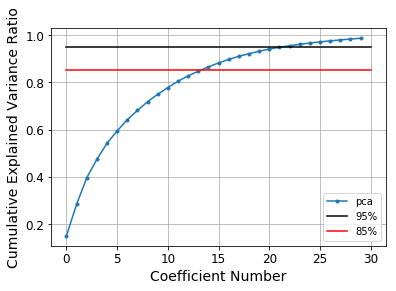

In [225]:
# Figure out number of components to achieve 85% cumulative explained variance
from sklearn import decomposition 
pca=decomposition.PCA(n_components=30)
dim_red_source=pca.fit(X_source_scaled)

fig =plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_),'.-',label='pca')
plt.plot([0, 30],[.95,.95],'k',label='95%')
plt.plot([0, 30],[.85,.85],'r',label='85%')
plt.xlabel('Coefficient Number')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid()
plt.legend()
plt.show()

In [226]:
# Transform/apply PCA
from sklearn import decomposition 
pca = decomposition.PCA(n_components=22)
dim_red_source = pca.fit_transform(X_source_scaled)

## Hierarchical Agglomerative Clustering (HAC)

In [ ]:
# Apply feature agglomeration
from sklearn.cluster import FeatureAgglomeration

# PUC feature agglomeration
agg = FeatureAgglomeration(n_clusters=16, affinity="cosine", linkage="average")
agg.fit(Xp_enm+0.0001)
Xp_source_red = pd.DataFrame(agg.transform(Xp_source))

In [115]:
print(Xc_source.shape)
print(Xf_source.shape)
print(Xp_source_red.shape)
print(Xm_source.shape)

(16354, 4)
(16354, 16)
(16354, 16)
(16354, 2)


In [116]:
# Concatenate all clustered and scaled features into new dataframe
XX_source = pd.concat([Xc_source, Xf_source, Xp_source_red, Xm_source], axis=1)
XX_source.tail(10)

,propMW,propMP,propBP,propLogDensity,absorbent,anti_adhesive_cohesive,antioxidant,antiredeposition_agent,biocide,brightener,...,group_dentalcare,group_deodorant,group_facialcleansingandmoisturizing,group_generalmoisturizing,group_makeupandrelated,group_paintstainandrelatedproducts,group_sunscreen,group_surfacesealers,refined_spray,matrix_F
29360,152.149,84.03215,263.941,0.078457,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1
29361,152.149,84.03215,263.941,0.078457,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1
29362,152.149,84.03215,263.941,0.078457,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
29363,152.149,84.03215,263.941,0.078457,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1
29364,152.149,84.03215,263.941,0.078457,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1
29365,152.149,84.03215,263.941,0.078457,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1
29366,152.149,84.03215,263.941,0.078457,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1
29367,152.149,84.03215,263.941,0.078457,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1
29368,135.210,-31.78080,203.080,-0.031517,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
29369,135.210,-31.78080,203.080,-0.031517,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1


In [117]:
# Export unscaled organics dataframe
XX_source.to_csv("./data/XX_source.csv", sep='\t', na_rep='', 
                 header=True, index=True, index_label=None, mode='w')

# Core models

In [121]:
# Fit gridsearch models to select best estimator
helper2 = EstimatorSelectionHelper(models, params)
helper2.fit(dim_red_source, np.log10(y_source), n_jobs=n_jobs, scoring='explained_variance') # n_jobs=1 by default

Running GridSearchCV for RandomForest.
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Running GridSearchCV for SVR.
Fitting 10 folds for each of 38 candidates, totalling 380 fits


[Parallel(n_jobs=3)]: Done  40 out of  40 | elapsed:    0.4s finished
[Parallel(n_jobs=3)]: Done 380 out of 380 | elapsed:    0.5s finished


In [122]:
# Compare performance for estimators
helper2.score_summary(sort_by='mean_score')

RandomForest
SVR


/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:52: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False



,estimator,min_score,mean_score,max_score,std_score,C,gamma,kernel,n_estimators
32,SVR,-0.498523,0.0321473,0.416344,0.2158,40,0.0001,rbf,NaN
37,SVR,-0.62239,0.0317421,0.47422,0.260206,50,0.0001,rbf,NaN
13,SVR,-0.621387,0.0317064,0.473894,0.259846,5,0.001,rbf,NaN
27,SVR,-0.374299,0.0291626,0.328704,0.16597,30,0.0001,rbf,NaN
22,SVR,-0.247183,0.0255942,0.2301,0.113148,20,0.0001,rbf,NaN
17,SVR,-0.127033,0.0149769,0.129502,0.0606043,10,0.0001,rbf,NaN
8,SVR,-0.1266,0.0148968,0.128834,0.0603578,1,0.001,rbf,NaN
12,SVR,-0.0612442,0.00999065,0.0759484,0.0324261,5,0.0001,rbf,NaN
7,SVR,-0.0118853,0.00246785,0.0173036,0.0068765,1,0.0001,rbf,NaN
9,SVR,-1.21769,0.00236644,0.588368,0.447092,1,0.01,rbf,NaN


In [123]:
# Pipeline/GridSearch to find best optimized model
# after selecting ideal estimator

# Pipeline
estimator = SVR(kernel='rbf')
prepipe = Pipeline([
    ('scale', MinMaxScaler()),
    ('estimator', estimator)
])

# Set parameter ranges for gridsearch
cv=10
n_jobs=3
c_set=[30,35,40,35]
gamma_set=[0.00003,0.0001,0.0003,0.001]

# Gridsearch
param_grid={'estimator__C': c_set,
            'estimator__gamma': gamma_set
           }
grid_search=GridSearchCV(prepipe,param_grid,cv=cv,scoring='explained_variance', n_jobs=n_jobs, pre_dispatch=2*n_jobs)
#grid_search.fit(XX,y_log)
grid_search.fit(dim_red_source+.0001,np.log10(y_source))
print(grid_search.best_params_)
print(grid_search.best_score_)

{'estimator__C': 40, 'estimator__gamma': 0.0003}
0.016344596124322503


## Compare feature predictivity

In [252]:
# SVC-RBF with WF bins
    # Function features
    # Accuracy

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Pipeline
estimator = SVC(kernel='rbf')
prepipe = Pipeline([
    ('scale', MinMaxScaler()),
    ('estimator', estimator)
])

# Set parameter ranges for gridsearch
cv=10
n_jobs=3
c_set=np.logspace(-1,4,5)
gamma_set=np.logspace(-5,0,5)

# Gridsearch
param_grid={'estimator__C': c_set,
            'estimator__gamma': gamma_set
           }
grid_search=GridSearchCV(prepipe,param_grid,cv=cv,scoring='accuracy', n_jobs=n_jobs, pre_dispatch=2*n_jobs)
grid_search.fit(Xf_source+0.00001,bin_source)
print(grid_search.best_params_)
print(grid_search.best_score_)

# Play sound when done running
Audio(url=sound_file, autoplay=True)

{'estimator__C': 1.7782794100389228, 'estimator__gamma': 0.05623413251903491}
0.42191512779748075


In [253]:
np.logspace(-1,4,5)

array([1.00000000e-01, 1.77827941e+00, 3.16227766e+01, 5.62341325e+02,
       1.00000000e+04])

In [254]:
# SVR-RBF with WF bins
    # Product category features
    # Accuracy

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Pipeline
estimator = SVC(kernel='rbf')
prepipe = Pipeline([
    ('scale', MinMaxScaler()),
    ('estimator', estimator)
])

# Set parameter ranges for gridsearch
cv=10
n_jobs=3
c_set=np.logspace(0,4,5)
gamma_set=np.logspace(-5,0,5)

# Gridsearch
param_grid={'estimator__C': c_set,
            'estimator__gamma': gamma_set
           }
grid_search=GridSearchCV(prepipe,param_grid,cv=cv,scoring='accuracy', n_jobs=n_jobs, pre_dispatch=2*n_jobs)
grid_search.fit(Xp_source+0.00001,bin_source)
print(grid_search.best_params_)
print(grid_search.best_score_)

# Play sound when done running
Audio(url=sound_file, autoplay=True)

{'estimator__C': 1.0, 'estimator__gamma': 1.0}
0.4758468876115935


In [255]:
# SVR-RBF with WF bins
    # Chemical property features
    # Accuracy

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Pipeline
estimator = SVC(kernel='rbf')
prepipe = Pipeline([
    ('scale', MinMaxScaler()),
    ('estimator', estimator)
])

# Set parameter ranges for gridsearch
cv=10
n_jobs=3
c_set=np.logspace(0,4,5)
gamma_set=np.logspace(-5,0,5)

# Gridsearch
param_grid={'estimator__C': c_set,
            'estimator__gamma': gamma_set
           }
grid_search=GridSearchCV(prepipe,param_grid,cv=cv,scoring='accuracy', n_jobs=n_jobs, pre_dispatch=2*n_jobs)
grid_search.fit(Xc_source+0.00001,bin_source)
print(grid_search.best_params_)
print(grid_search.best_score_)

# Play sound when done running
Audio(url=sound_file, autoplay=True)

{'estimator__C': 100.0, 'estimator__gamma': 0.00017782794100389227}
0.5316742081447964


In [113]:
# SVR-RBF with WF bins
    # Product matrix features
    # Accuracy

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Pipeline
estimator = SVC(kernel='rbf')
prepipe = Pipeline([
    ('scale', MinMaxScaler()),
    ('estimator', estimator)
])

# Set parameter ranges for gridsearch
cv=10
n_jobs=3
c_set=np.logspace(0,4,5)
gamma_set=np.logspace(-5,0,5)

# Gridsearch
param_grid={'estimator__C': c_set,
            'estimator__gamma': gamma_set
           }
grid_search=GridSearchCV(prepipe,param_grid,cv=cv,scoring='accuracy', n_jobs=n_jobs, pre_dispatch=2*n_jobs)
grid_search.fit(Xm_source+0.00001,bin_source)
print(grid_search.best_params_)
print(grid_search.best_score_)

# Play sound when done running
Audio(url=sound_file, autoplay=True)

{'estimator__C': 0.7847599703514611, 'estimator__gamma': 0.4832930238571752}
0.4878048780487805


## PCA, WF Bins

In [108]:
# SVR-RBF with all features, normalized
    # ENM weight fractions (PCA)
    # Accuracy

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Pipeline
estimator = SVC(kernel='rbf',class_weight=None)
prepipe = Pipeline([
#    ('scale', MinMaxScaler()),
    ('estimator', estimator)
])

# Set parameter ranges for gridsearch
cv=10
n_jobs=3
c_set=np.logspace(-2,4,20)
gamma_set=np.logspace(-6,0,20)

# Gridsearch
param_grid={'estimator__C': c_set,
            'estimator__gamma': gamma_set
           }
grid_search=GridSearchCV(prepipe,param_grid,cv=cv,scoring='accuracy', n_jobs=n_jobs, pre_dispatch=2*n_jobs)
grid_search.fit(dim_red_source,bin_source)
print(grid_search.best_params_)
print(grid_search.best_score_)

# Play sound when done running
Audio(url=sound_file, autoplay=True)

{'estimator__C': 14.38449888287663, 'estimator__gamma': 0.012742749857031322}
0.6463414634146342


In [109]:
# SVR-RBF with all features, normalized
    # ENM weight fractions (PCA)
    # Explained variance

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Pipeline
estimator = SVC(kernel='rbf',class_weight=None)
prepipe = Pipeline([
#    ('scale', MinMaxScaler()),
    ('estimator', estimator)
])

# Set parameter ranges for gridsearch
cv=10
n_jobs=3
c_set=np.logspace(-2,4,20)
gamma_set=np.logspace(-6,0,20)

# Gridsearch
param_grid={'estimator__C': c_set,
            'estimator__gamma': gamma_set
           }
grid_search=GridSearchCV(prepipe,param_grid,cv=cv,scoring='explained_variance', n_jobs=n_jobs, pre_dispatch=2*n_jobs)
grid_search.fit(dim_red_source,bin_source)
print(grid_search.best_params_)
print(grid_search.best_score_)

# Play sound when done running
Audio(url=sound_file, autoplay=True)

{'estimator__C': 0.7847599703514611, 'estimator__gamma': 0.11288378916846883}
0.31160725453408383


In [507]:
# Final pipeline
bestpipe = Pipeline([
    ('scale', MinMaxScaler()),
    ('estimator', SVC(kernel='rbf', C=3, gamma=0.1))
     ])
bestpipe.fit(XX_source,bin_source)

Pipeline(memory=None,
     steps=[('scale', MinMaxScaler(copy=True, feature_range=(0, 1))), ('estimator', SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [513]:
# Predictions for ENM WF
y_source_predict=bestpipe.predict(XX_source) 

(55,)


In [515]:
# Accuracy score of model
from sklearn.metrics import accuracy_score
accuracy_score(bin_source, y_source_predict, normalize=True, sample_weight=None)

0.81818181818181823

In [155]:
# Make a confusion matrix to summarize accuracy across labels
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[31  1  0]
 [ 4 10  0]
 [ 2  3  4]]
Normalized confusion matrix
[[ 0.97  0.03  0.  ]
 [ 0.29  0.71  0.  ]
 [ 0.22  0.33  0.44]]


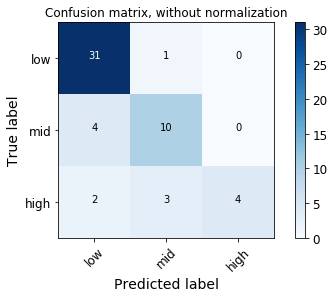

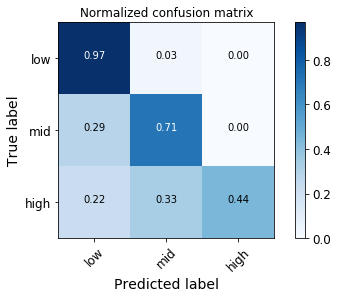

In [556]:
# Define confusion matrix
cnf_matrix = confusion_matrix(bin_source, y_source_predict)

np.set_printoptions(precision=2)
class_names=["low","mid","high"]

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

## NEW ENM Model (Clusters)

In [124]:
# SVR-RBF with all features, normalized
    # ENM weight fractions
    # Accuracy

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Pipeline
estimator = SVC(kernel='rbf',class_weight='balanced')
prepipe = Pipeline([
    ('scale', MinMaxScaler()),
    ('estimator', estimator)
])

# Set parameter ranges for gridsearch
cv=10
n_jobs=3
c_set=np.logspace(-2,4,20)
gamma_set=np.logspace(-6,0,20)

# Gridsearch
param_grid={'estimator__C': c_set,
            'estimator__gamma': gamma_set
           }
grid_search=GridSearchCV(prepipe,param_grid,cv=cv,scoring='accuracy', n_jobs=n_jobs, pre_dispatch=2*n_jobs)
grid_search.fit(XX_source,bin_source) #dim_red_source
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.scoring)

# Play sound when done running
Audio(url=sound_file, autoplay=True)

{'estimator__C': 61.584821106602604, 'estimator__gamma': 0.012742749857031322}
0.6219512195121951
accuracy


Essentially leave one out cross validation, slight biases, might be overfitting

In [125]:
# Final pipeline
bestpipe = Pipeline([
    ('scale', MinMaxScaler()),
    ('estimator', SVC(kernel='rbf',class_weight='balanced', C=61.584821, gamma=0.01274275))
     ])

In [126]:
# Make a confusion matrix to summarize accuracy across labels
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [127]:
from sklearn import model_selection
kfold = model_selection.StratifiedKFold(n_splits=17,shuffle=True)
cnf_matrix2=np.zeros([3,3])
X=np.array(XX_source)
y=np.array(bin_source)
for train_index,test_index in kfold.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    bestpipe.fit(X_train,y_train)
    y_source_predict=bestpipe.predict(X_test)
    y[test_index]=y_source_predict
    cnf_matrix2+= confusion_matrix(y_test, y_source_predict);

In [128]:
cnf_matrix=cnf_matrix2.astype(np.int)

Confusion matrix, without normalization
[[29  2  5]
 [11 15  3]
 [ 3  2 12]]
Normalized confusion matrix
[[0.81 0.06 0.14]
 [0.38 0.52 0.1 ]
 [0.18 0.12 0.71]]


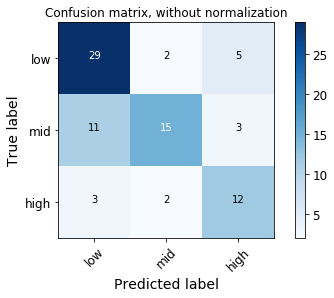

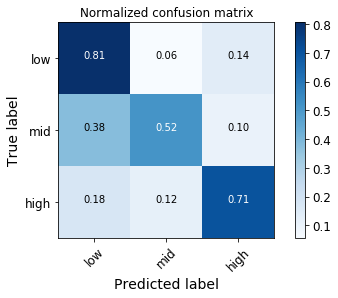

In [129]:
# Define confusion matrix
cnf_matrix = confusion_matrix(bin_source, y)

np.set_printoptions(precision=2)
class_names=["low","mid","high"]

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

## NEW ENM Model (PCA)

In [130]:
# SVR-RBF with all features, normalized
    # ENM weight fractions
    # Accuracy

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Pipeline
estimator = SVC(kernel='rbf',class_weight='balanced')
prepipe = Pipeline([
#    ('scale', MinMaxScaler()),
    ('estimator', estimator)
])

# Set parameter ranges for gridsearch
cv=10
n_jobs=3
c_set=np.logspace(-2,4,20)
gamma_set=np.logspace(-6,0,20)

# Gridsearch
param_grid={'estimator__C': c_set,
            'estimator__gamma': gamma_set
           }
grid_search=GridSearchCV(prepipe,param_grid,cv=cv,scoring='accuracy', n_jobs=n_jobs, pre_dispatch=2*n_jobs)
grid_search.fit(dim_red_source,bin_source)
print(grid_search.best_params_)
print(grid_search.best_score_)

# Play sound when done running
Audio(url=sound_file, autoplay=True)

{'estimator__C': 0.37926901907322497, 'estimator__gamma': 0.11288378916846883}
0.5975609756097561


In [132]:
# Final pipeline
bestpipe = Pipeline([
    ('scale', MinMaxScaler()),
    ('estimator', SVC(kernel='rbf',class_weight='balanced', C=0.379269, gamma=0.112884))
     ])
bestpipe.fit(dim_red_source,bin_source)

Pipeline(memory=None,
     steps=[('scale', MinMaxScaler(copy=True, feature_range=(0, 1))), ('estimator', SVC(C=0.379269, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.112884, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [133]:
from sklearn import model_selection
kfold = model_selection.StratifiedKFold(n_splits=17,shuffle=True)
cnf_matrix2=np.zeros([3,3])
X=np.array(XX_source)
y=np.array(bin_source)
for train_index,test_index in kfold.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    bestpipe.fit(X_train,y_train)
    y_source_predict=bestpipe.predict(X_test)
    y[test_index]=y_source_predict
    cnf_matrix2+= confusion_matrix(y_test, y_source_predict);

In [134]:
cnf_matrix=cnf_matrix2.astype(np.int)

Confusion matrix, without normalization
[[31  4  1]
 [13 13  3]
 [ 5  6  6]]
Normalized confusion matrix
[[0.86 0.11 0.03]
 [0.45 0.45 0.1 ]
 [0.29 0.35 0.35]]


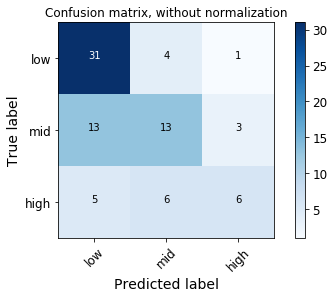

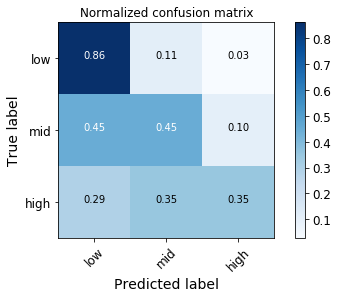

In [135]:
# Define confusion matrix
cnf_matrix = confusion_matrix(bin_source, y)

np.set_printoptions(precision=2)
class_names=["low","mid","high"]

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [153]:
# TODO: correlation matrix of features vs 
source_corr = pd.concat(XX_source,y_source.apply(np.log10(), axis=1)) #np.log10(y_source)
plt.matshow(source_corr.corr())

ValueError: invalid number of arguments